In [2]:
import cv2
import numpy as np

import PIL
import matplotlib.pyplot as plt

In [3]:
image1 = cv2.imread('../data/left.png')
image2 = cv2.imread('../data/front.png')
image3 = cv2.imread('../data/right.png')
image4 = cv2.imread('../data/rear.png')

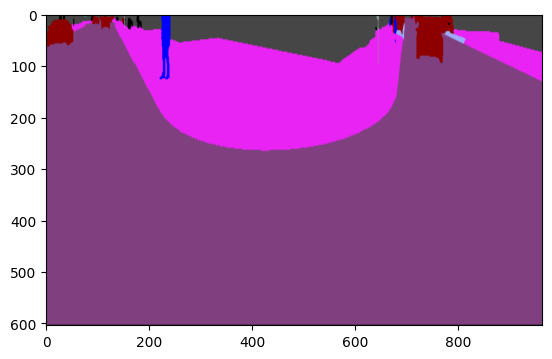

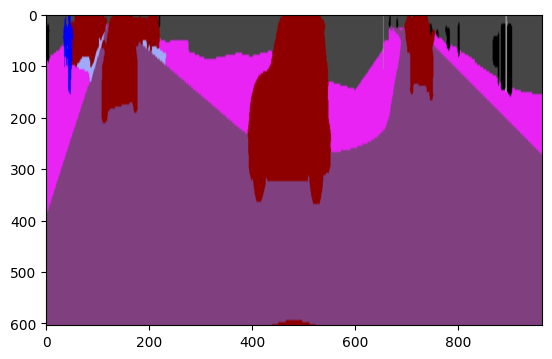

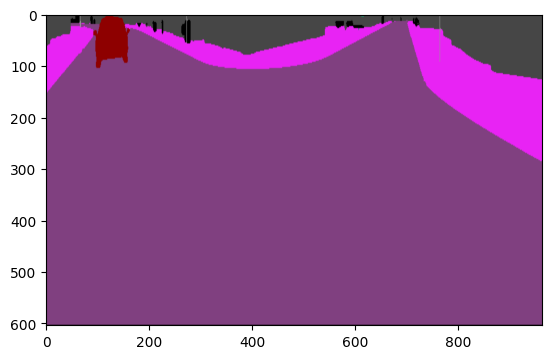

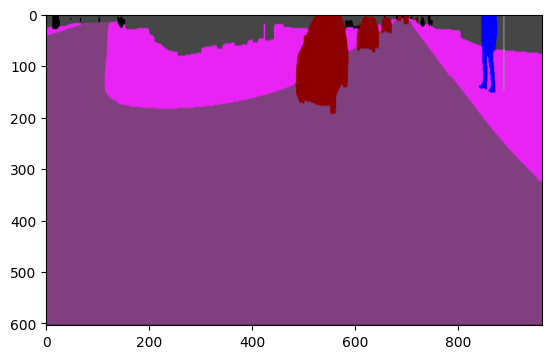

(<matplotlib.image.AxesImage at 0x1f2c5328790>, None)

In [25]:
height, width = image1.shape[:2]

src_pts1 = np.array([[0, 300], [width, 300], [0, height], [width, height]], dtype=np.float32)
src_pts2 = np.array([[0, 300], [width, 300], [0, 450], [width, 450]], dtype=np.float32)
src_pts3 = np.array([[0, 300], [width, 300], [0, height], [width, height]], dtype=np.float32)
src_pts4 = np.array([[0, 300], [width, 300], [0, height], [width, height]], dtype=np.float32)

dst_pts = np.array([[0, 0], [width, 0], [0, height], [width, height]], dtype=np.float32)

M1 = cv2.getPerspectiveTransform(src_pts1, dst_pts)
M2 = cv2.getPerspectiveTransform(src_pts2, dst_pts)
M3 = cv2.getPerspectiveTransform(src_pts3, dst_pts)
M4 = cv2.getPerspectiveTransform(src_pts4, dst_pts)

warped_image1 = cv2.warpPerspective(image1, M1, (width, height))
warped_image2 = cv2.warpPerspective(image2, M2, (width, height))
warped_image3 = cv2.warpPerspective(image3, M3, (width, height))
warped_image4 = cv2.warpPerspective(image4, M4, (width, height))

plt.imshow(warped_image1), plt.show()
plt.imshow(warped_image2), plt.show()
plt.imshow(warped_image3), plt.show()
plt.imshow(warped_image4), plt.show()

In [26]:
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

In [27]:
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(warped_image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(warped_image2, None)

In [28]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50) # or pass empty dictionary

In [29]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [30]:
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

In [31]:
matchesMask = [[0,0] for i in range(len(matches))]

In [32]:
for i,(m,n) in enumerate(matches):
    if m.distance < 0.6*n.distance:
        matchesMask[i]=[1,0]

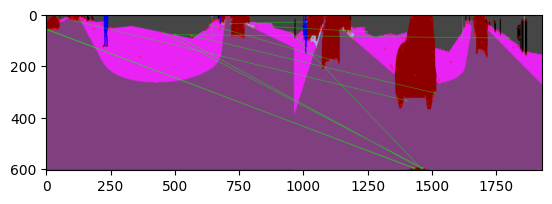

(<matplotlib.image.AxesImage at 0x1f2c52b0310>, None)

In [33]:
draw_params = dict(matchColor = (0,255,0),
    singlePointColor = (255,0,0),
    matchesMask = matchesMask,
    flags = cv2.DrawMatchesFlags_DEFAULT)

good_matches = []
for m,n in matches:
    if m.distance < 0.6 * n.distance:
        good_matches.append(m)
 
img3 = cv2.drawMatchesKnn(warped_image1,keypoints1, warped_image2,keypoints2,matches,None,**draw_params)
 
plt.imshow(img3,),plt.show()

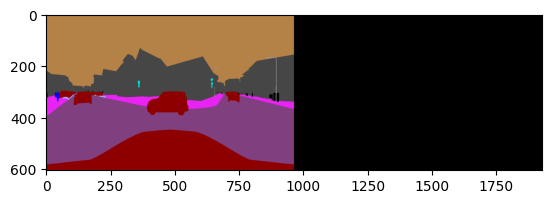

(<matplotlib.image.AxesImage at 0x1f2c2d189d0>, None)

In [13]:
src_points = np.float32([keypoints1[match.queryIdx].pt for match in good_matches]).reshape(-1, 1, 2)
dst_points = np.float32([keypoints2[match.trainIdx].pt for match in good_matches]).reshape(-1, 1, 2)

M, mask = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5.0)

# Use homography to warp images
h, w, _ = image1.shape
panorama = cv2.warpPerspective(image1, M, (w * 2, h))


# Place the second image into the panorama
panorama[0:image2.shape[0], 0:image2.shape[1]] = image2
img4 = panorama

plt.imshow(img4), plt.show()

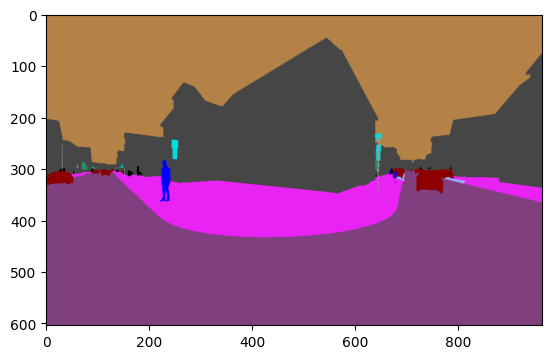

(<matplotlib.image.AxesImage at 0x1f2c2cdbd50>, None)

In [14]:
plt.imshow(image1), plt.show()

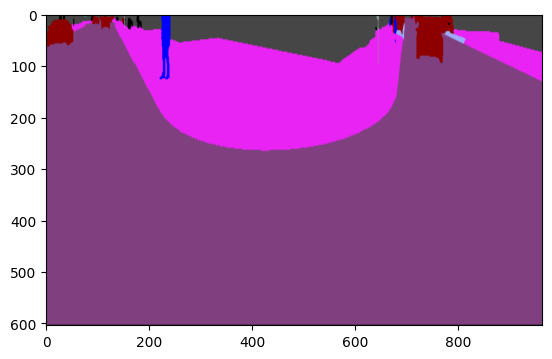

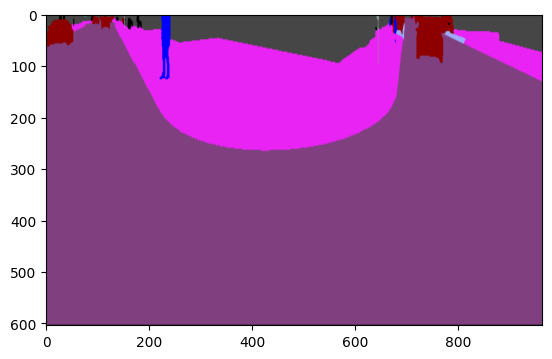

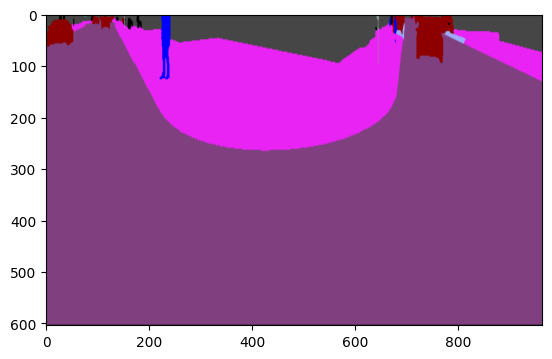

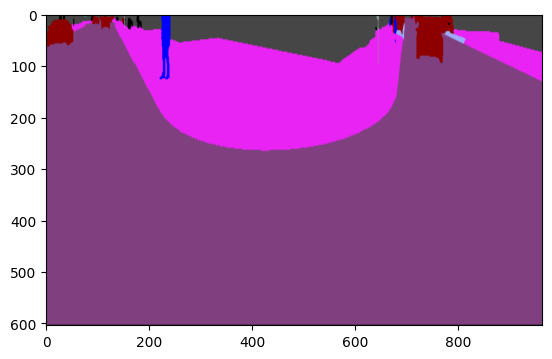

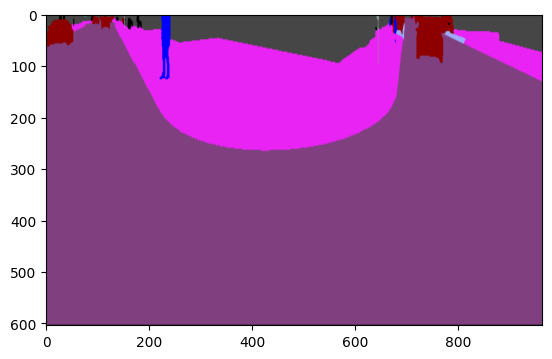

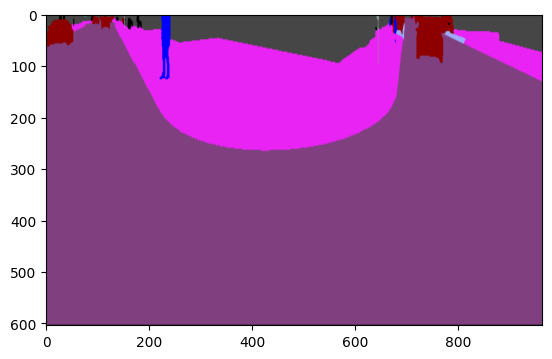

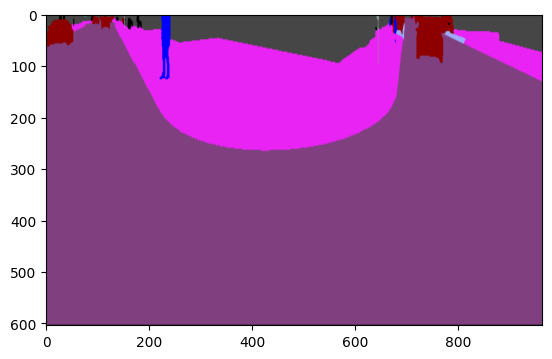

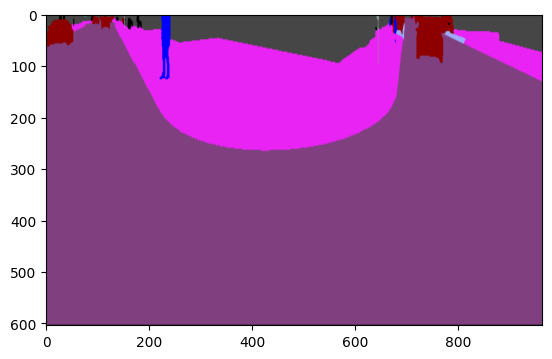

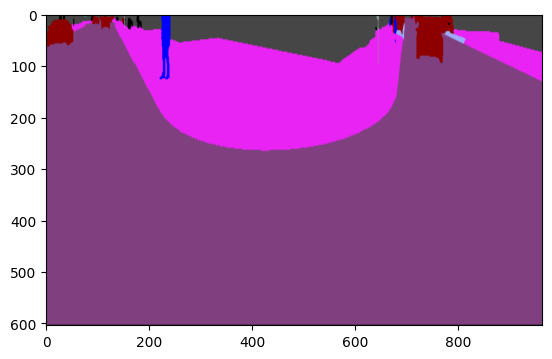

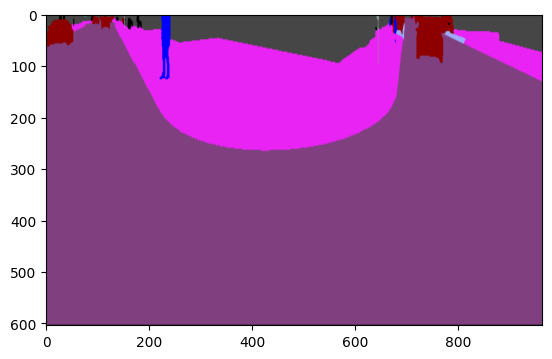

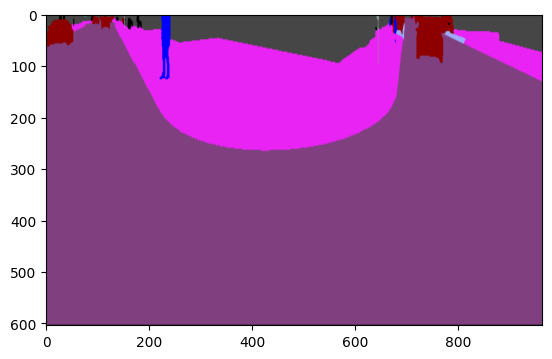

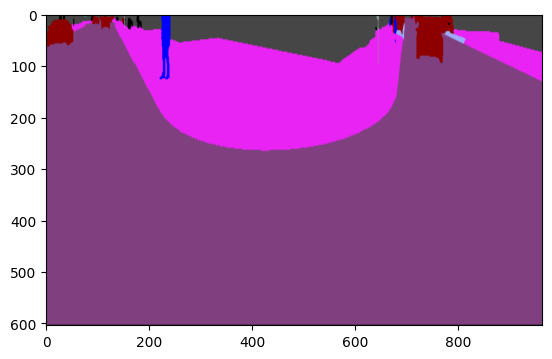

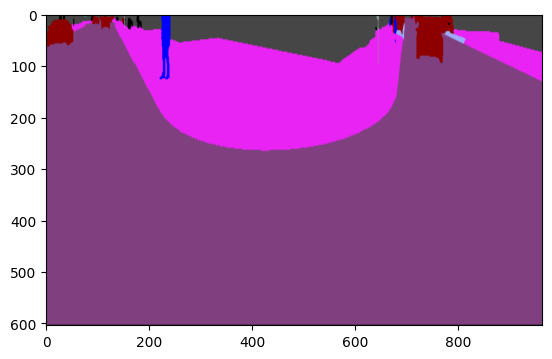

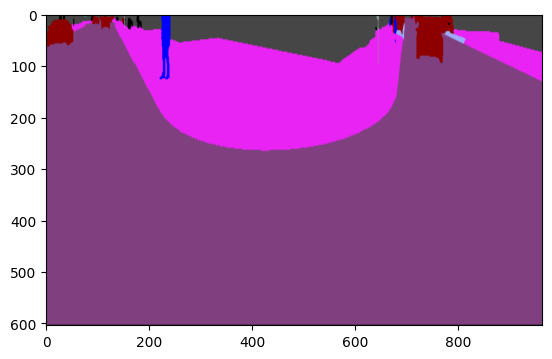

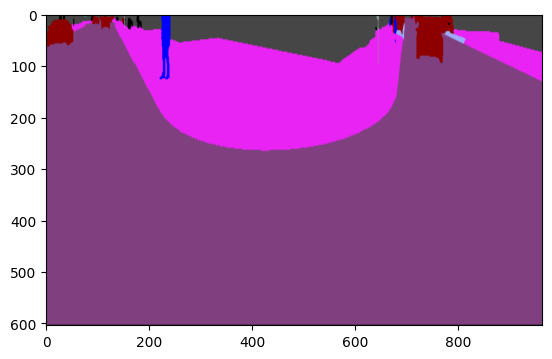

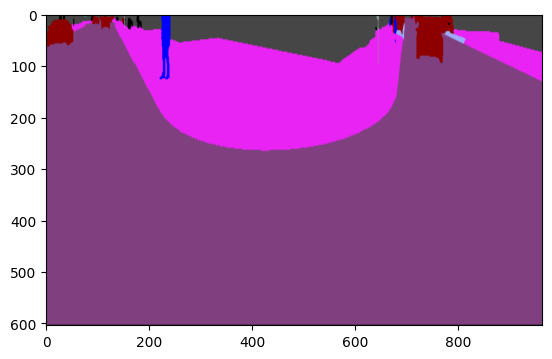

In [34]:
height, width = image1.shape[:2]

for i in range(0, 800, 50):
    src_pts = np.array([[0, 300+i], [width, 300+i], [0, height], [width, height]], dtype=np.float32)
    #src_pts2 = np.array([[0, 300], [width, 300], [0, 450], [width, 450]], dtype=np.float32)
    #src_pts3 = np.array([[0, 300], [width, 300], [0, height], [width, height]], dtype=np.float32)
    #src_pts4 = np.array([[0, 300], [width, 300], [0, height], [width, height]], dtype=np.float32)

    dst_pts = np.array([[0, 0], [width, 0], [0, height], [width, height]], dtype=np.float32)

    M1 = cv2.getPerspectiveTransform(src_pts1, dst_pts)
    #M2 = cv2.getPerspectiveTransform(src_pts2, dst_pts)
    #M3 = cv2.getPerspectiveTransform(src_pts3, dst_pts)
    #M4 = cv2.getPerspectiveTransform(src_pts4, dst_pts)

    warped_image = cv2.warpPerspective(image1, M1, (width, height))
    #warped_image2 = cv2.warpPerspective(image2, M2, (width, height))
    #warped_image3 = cv2.warpPerspective(image3, M3, (width, height))
    #warped_image4 = cv2.warpPerspective(image4, M4, (width, height))

    plt.imshow(warped_image1), plt.show()
    #plt.imshow(warped_image2), plt.show()
    #plt.imshow(warped_image3), plt.show()
    #plt.imshow(warped_image4), plt.show()